In [1]:
# try frobenius method??


# test residuals to see if (x, t) solution satisfies original differential equations

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from cswe_harm import *


In [39]:
comp = CSWEHarm()
comp.r = 0.45
comp.h0 = 0.4

comp.small_number = 1e-9
comp.solve_LO_small_number()

print(comp.x)
print(comp.x.shape)


[0.00000000e+00 9.90990891e-04 1.98198178e-03 ... 9.99979980e-01
 9.99989990e-01 1.00000000e+00]
(2000,)


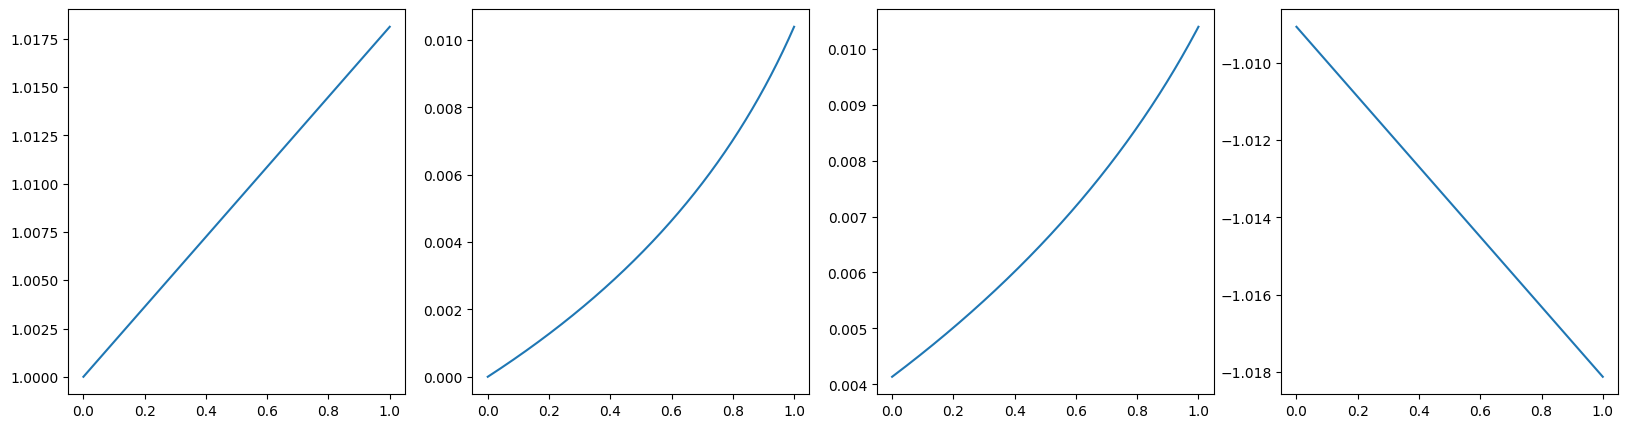

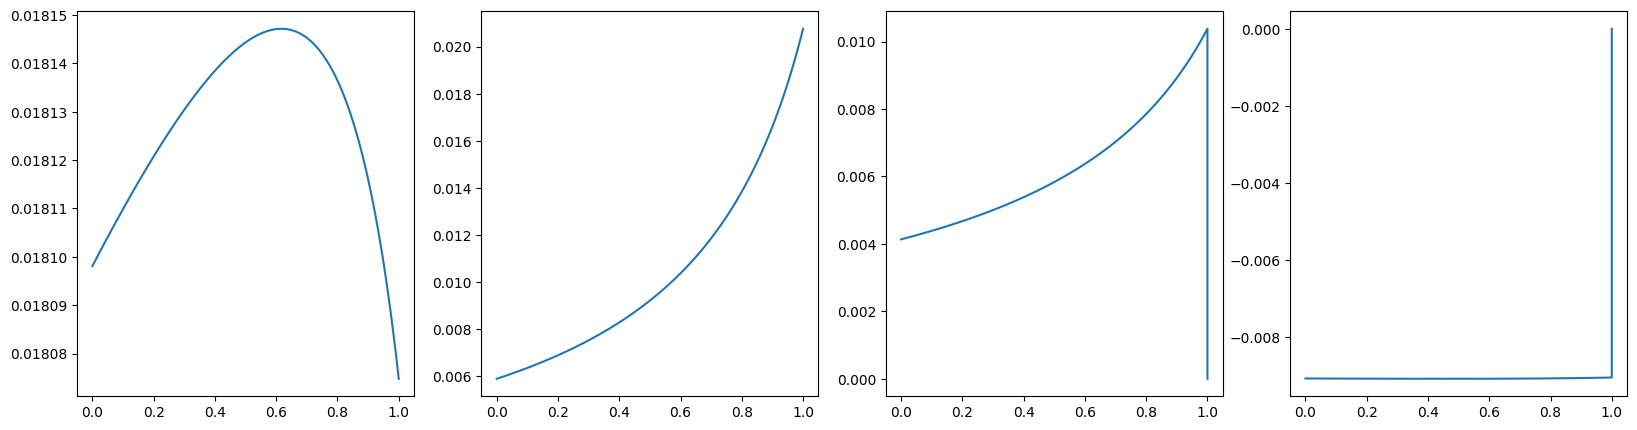

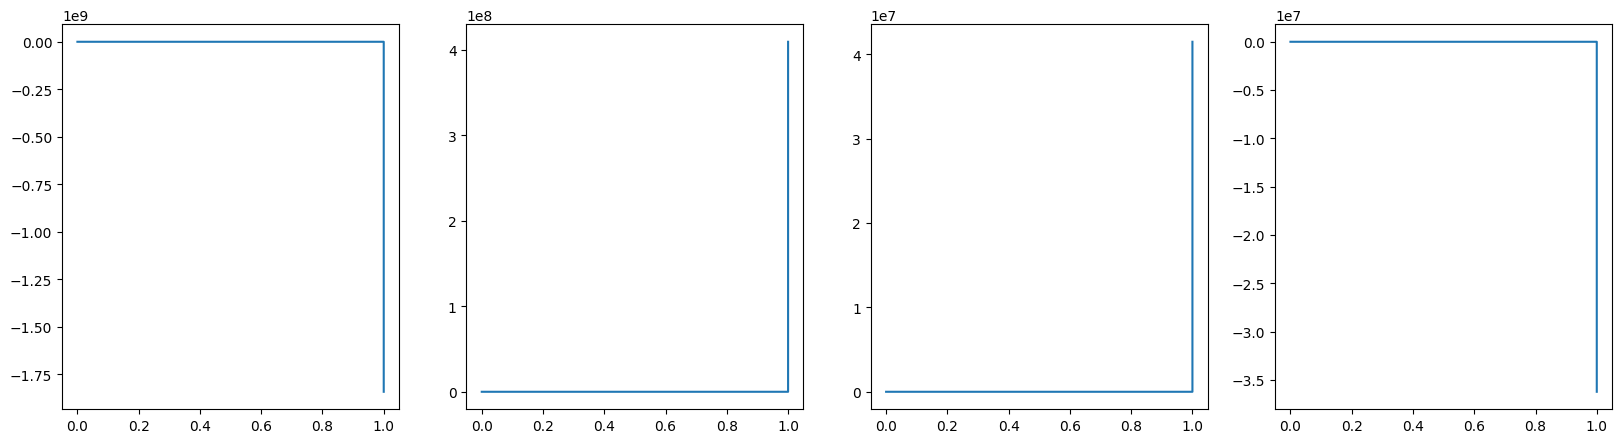

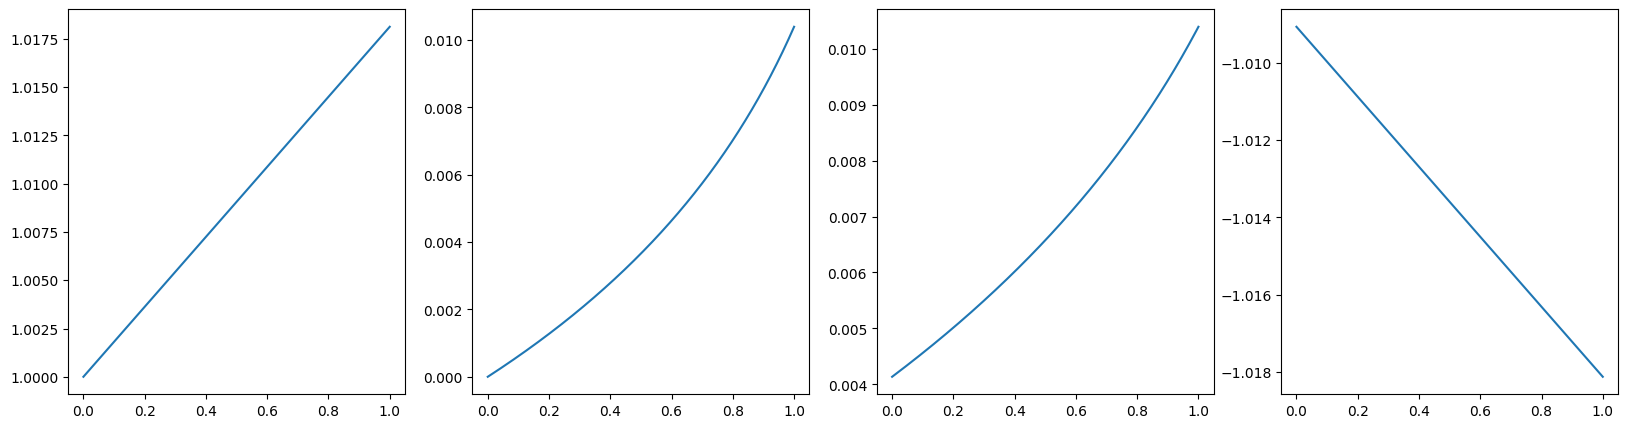

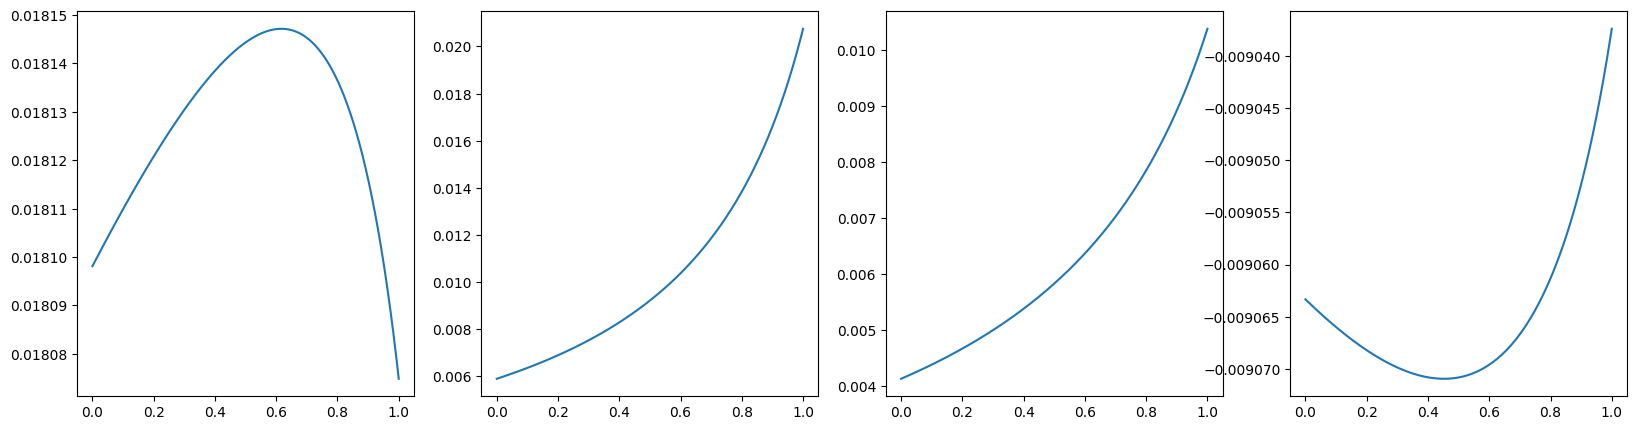

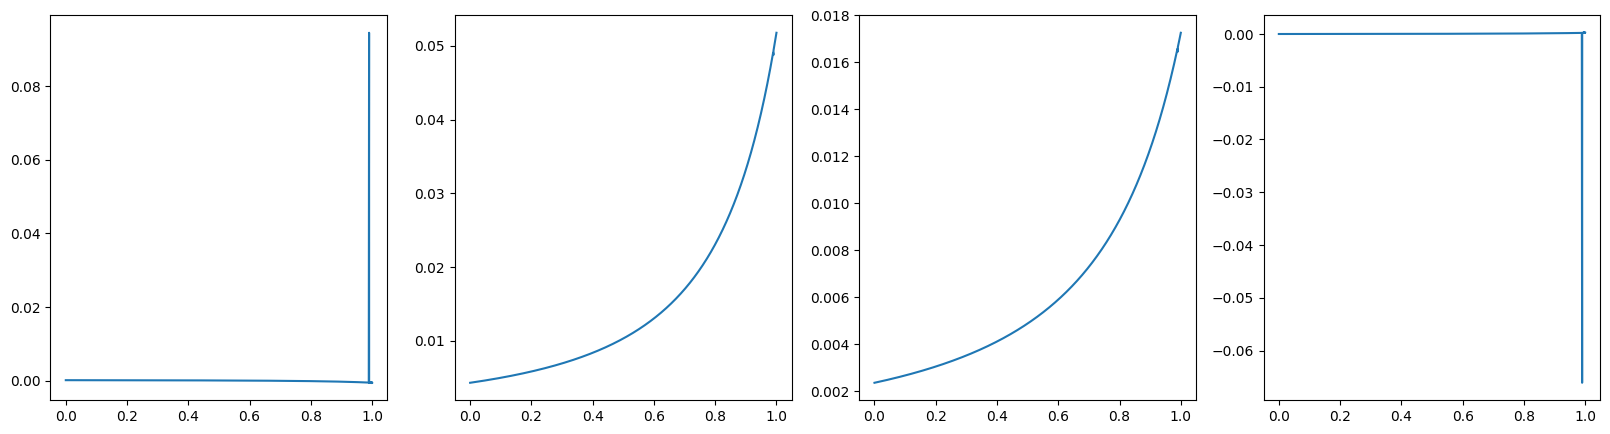

SystemError: 

In [40]:


comp.debug = True
# comp.boundary = 1 - 1e-3
# comp.solve_FO_split_domain()
comp.small_number = 1e-6
comp.solve_FO_small_number()

C:\Users\jolieken\AppData\Local\Temp\ipykernel_54360\3672969585.py:14: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x, sp.j0(np.sqrt(1-x)))


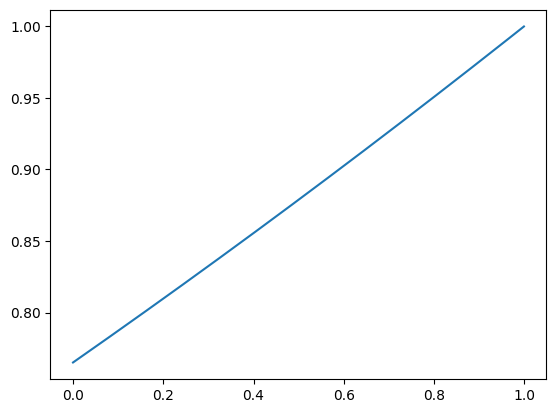

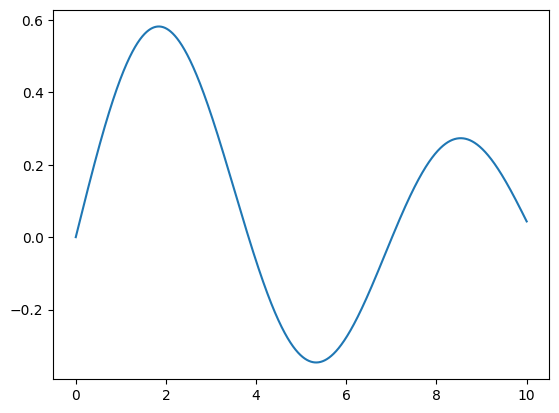

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial import chebyshev as C
from scipy.interpolate import splrep, BSpline
from scipy import special
import scipy.special as sp
from scipy.integrate import quad

import math

x = np.linspace(0, 10, 10000)

plt.plot(x, sp.j0(np.sqrt(1-x)))
plt.show()

plt.plot(x, sp.j1(x))
plt.show()


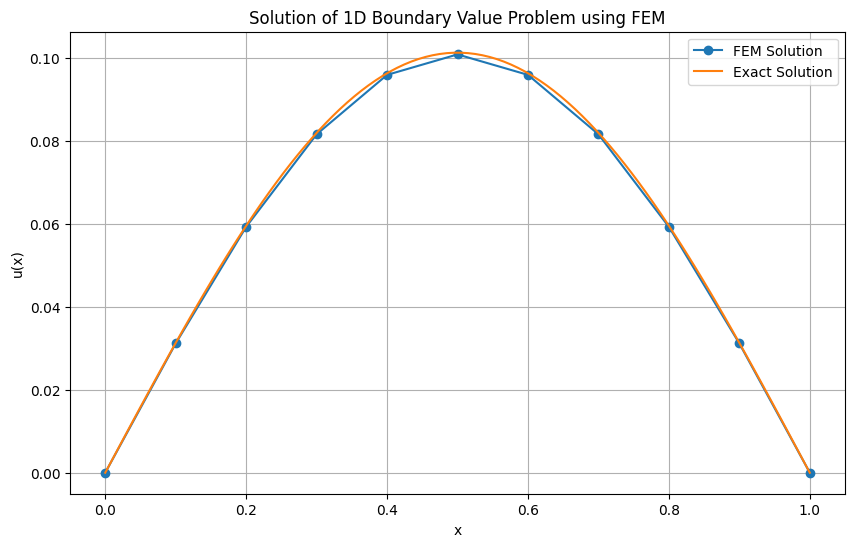

Node positions (x_nodes): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
FEM solution (U): [0.         0.03118009 0.05930806 0.08163055 0.09596246 0.1009009
 0.09596246 0.08163055 0.05930806 0.03118009 0.        ]
Exact solution at nodes: [0.00000000e+00 3.13099676e-02 5.95550975e-02 8.19705595e-02
 9.63621719e-02 1.01321184e-01 9.63621719e-02 8.19705595e-02
 5.95550975e-02 3.13099676e-02 1.24082663e-17]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Problem parameters
L = 1.0
k = 1.0
u0 = 0.0
uL = 0.0
def f(x):
    return np.sin(np.pi * x)

# Exact solution for verification
def exact_solution(x):
    return (1 / np.pi**2) * np.sin(np.pi * x)

# 2. Mesh generation
num_elements = 10
num_nodes = num_elements + 1
x_nodes = np.linspace(0, L, num_nodes)
h = x_nodes[1] - x_nodes[0] # Element length

# 3. Assembly of the global stiffness matrix (K) and force vector (F)
K = np.zeros((num_nodes, num_nodes))
F = np.zeros(num_nodes)

# Loop over each element
for e in range(num_elements):
    # Element's nodes
    node_i = e
    node_j = e + 1

    # Local stiffness matrix for a linear element
    # The derivatives of the hat functions are 1/h and -1/h
    K_local = (k / h) * np.array([[1, -1], [-1, 1]])

    # Add the local matrix to the global matrix
    K[node_i, node_i] += K_local[0, 0]
    K[node_i, node_j] += K_local[0, 1]
    K[node_j, node_i] += K_local[1, 0]
    K[node_j, node_j] += K_local[1, 1]

    # Local force vector for linear element and f(x) = sin(pi*x)
    # This integral can be done analytically or numerically (e.g., using a simple numerical quadrature rule)
    # Using simple quadrature (trapezoidal rule for f(x))
    F_local_i = (h / 2) * (f(x_nodes[node_i]) + f(x_nodes[node_j]))
    F_local_j = (h / 2) * (f(x_nodes[node_j]) + f(x_nodes[node_i]))

    # Add local force vector to global force vector
    F[node_i] += F_local_i / 2
    F[node_j] += F_local_j / 2

# A more accurate way to compute F_local would be to integrate the product
# of f(x) and the shape functions over the element.
# For f(x) = sin(pi*x) and linear shape functions, we can do it exactly.
# Let's re-calculate F with a better approximation (midpoint rule) for simplicity.
F_new = np.zeros(num_nodes)
for e in range(num_elements):
    x_mid = (x_nodes[e] + x_nodes[e+1]) / 2
    f_mid = f(x_mid)
    
    # Integral of phi_i * f(x) over the element is approx (h/2) * f(x_mid)
    F_new[e] += (h/2) * f_mid
    F_new[e+1] += (h/2) * f_mid
F = F_new
    
# 4. Apply Boundary Conditions
# We have Dirichlet BCs at both ends. We'll use the simplest method:
# setting the row and column of the known nodes to zero and the diagonal to 1.
# This is called the "elimination method".

# Boundary at x=0
K[0, :] = 0
K[:, 0] = 0
K[0, 0] = 1
F[0] = u0

# Boundary at x=L
K[-1, :] = 0
K[:, -1] = 0
K[-1, -1] = 1
F[-1] = uL

# 5. Solve the system of linear equations KU = F
U = np.linalg.solve(K, F)

# 6. Plot the results
x_plot = np.linspace(0, L, 100)
u_exact = exact_solution(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_nodes, U, 'o-', label='FEM Solution')
plt.plot(x_plot, u_exact, label='Exact Solution')
plt.title('Solution of 1D Boundary Value Problem using FEM')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

# Print some values for comparison
print("Node positions (x_nodes):", x_nodes)
print("FEM solution (U):", U)
print("Exact solution at nodes:", exact_solution(x_nodes))